In [108]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
import pickle
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /Users/liang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
## Load the dataset
DF_Final=pd.read_csv("Data_Final.csv")
DF_Final.head()

,Unnamed: 0,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [3]:
## Data prepossing
documents = []

X = DF_Final.Review
stemmer = WordNetLemmatizer()
for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [5]:
#------------------------------------Sentiment Lexicon------------------------------------------\
f_n = open("negative-words.txt", "r")
Negative_words = f_n.readlines()
f_p = open("positive-words.txt", "r")
Positive_words = f_p.readlines()
Voca = [i.rstrip('\n') for i in Positive_words] + [i.rstrip('\n') for i in Negative_words]
vectorizer = CountVectorizer(max_features=1500, min_df=0.1, max_df=0.7, stop_words=stopwords.words('english'),vocabulary=np.unique(Voca))
X = vectorizer.fit_transform(documents).toarray()
X

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1322: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
X.shape

(53845, 6816)

In [85]:
## Utilize the PCA to reduce the dimension
from sklearn.decomposition import PCA
 
pca = PCA(n_components=80)
reduced_x = pca.fit_transform(X)

In [86]:
def category(name):
    number=pd.Series(documents).str.contains(name).sum()
    return(number)
def reviews(name):
    number=sum([i.count(name)  for i in documents ])
    return(number)

In [87]:
d1=pd.DataFrame.from_dict({"entertainment":category("entertainment"),
               "beauty":category("beauty"),
                "home service":category("home service"),
                "automotive":category("entertainment"),
                "fitness":category("entertainment"),
                "heath/medical":category("health")+category("medical"),
                "nightlife":category("nightlife"),
                "food":category("food"),
                "shopping":category("shopping"),
                "hotels/travel":category("hotels")+category("travel"),
                "restaurant":category("restaurant")}, orient='index')
d1.columns=["value"]

In [88]:
d1["percentage"]=round(d1.value/sum(d1.value),4)*100
d1

,value,percentage
entertainment,143,0.45
beauty,265,0.83
home service,15,0.05
automotive,143,0.45
fitness,143,0.45
heath/medical,1408,4.43
nightlife,40,0.13
food,19337,60.78
shopping,1036,3.26
hotels/travel,773,2.43


Text(0.5, 1.0, 'Distribution of Business Categories')

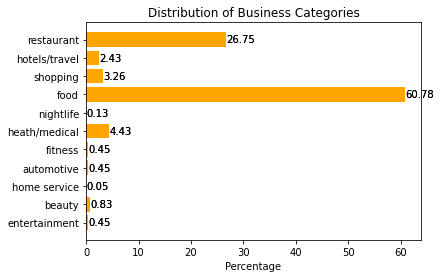

In [89]:
fig, ax = plt.subplots()
bars = ax.barh(d1.index.tolist(), d1.percentage,color="orange")
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Percentage")
plt.title("Distribution of Business Categories")

In [90]:
d2=pd.DataFrame.from_dict({"entertainment":reviews("entertainment"),
               "beauty":reviews("beauty"),
                "home service":reviews("home service"),
                "automotive":reviews("entertainment"),
                "fitness":reviews("entertainment"),
                "heath/medical":reviews("health")+reviews("medical"),
                "nightlife":reviews("nightlife"),
                "food":reviews("food"),
                "shopping":reviews("shopping"),
                "hotels/travel":reviews("hotels")+reviews("travel"),
                "restaurant":reviews("restaurant")}, orient='index')
d2.columns=["value"]
d2
d2["percentage"]=round(d2.value/sum(d2.value),4)*100
d2

,value,percentage
entertainment,153,0.32
beauty,288,0.60
home service,15,0.03
automotive,153,0.32
fitness,153,0.32
heath/medical,1718,3.60
nightlife,40,0.08
food,31338,65.61
shopping,1180,2.47
hotels/travel,874,1.83


Text(0.5, 1.0, 'Distribution of Reviews')

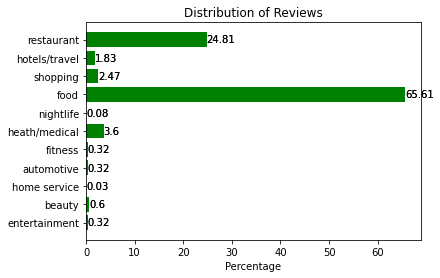

In [91]:
fig, ax = plt.subplots()
bars = ax.barh(d2.index.tolist(), d2.percentage,color="green")
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Percentage")
plt.title("Distribution of Reviews")

In [92]:
## generate the y variable(Rating)
list_tep = [int(i) for i in (DF_Final['Star']>=4)]
DF_Final['Rating'] = list_tep
DF_Final

,Unnamed: 0,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,Rating
0,0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20,1
1,1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12,1
2,2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05,0
3,3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99,1
4,4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53840,53840,wuxZSSVXwKzN3NPcdSljUA,q0DRuEAxE5i57xNSTrDP4Q,3.0,2,0,2,So let me begin by stating that the owner of N...,CA,Isla Vista,3.5,227,360,153,133,"2014,2015,2016,2017,2018,2019,20,20,2021",11,3.41,0
53841,53841,ZDCWEctaQHfJQT1sH_rMmA,rZQqiElaeM7JO2rQAXHK2w,5.0,3,2,2,We've used Jerry The Plumber for water heater ...,CA,Santa Barbara,4.5,691,2353,427,1361,"2016,2017,2018,2019,20,20,2021",23,4.74,1
53842,53842,ZDCWEctaQHfJQT1sH_rMmA,EA4v61tJCHg8xhk7bqn8Yw,5.0,2,2,0,"Wow, talk about some of the best deals I've ev...",CA,Santa Barbara,4.5,691,2353,427,1361,"2016,2017,2018,2019,20,20,2021",23,4.74,1
53843,53843,SSlW0LTQwER5obHjTW0ZIg,3tvi-OJ_-iK1ecjzSaH-oA,5.0,4,3,2,My Husband and I decided to stop into Hook and...,CA,Santa Barbara,4.5,163,391,155,286,"2015,2016,2017,2018,2019,20,20,2021",20,4.36,1


In [93]:
y = DF_Final["Rating"]
y

0        1
1        1
2        0
3        1
4        1
        ..
53840    0
53841    1
53842    1
53843    1
53844    1
Name: Rating, Length: 53845, dtype: int64

In [94]:
## set the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(reduced_x, y, test_size=0.2)

In [95]:
## Five supervised learning
# 1. logistic regression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [96]:
# find the intercept and coeficient of the logistic model
model1.intercept_
model1.coef_

array([[ 0.03310523,  0.59260193, -0.78682124,  0.28317334,  1.67999206,
        -0.93282288, -0.03328493, -0.25870671, -0.1192343 , -0.56806957,
         0.55594955, -0.1249297 ,  0.77118346, -0.22328707, -1.03408869,
        -0.16398386,  0.9724541 , -0.72093692,  0.83134857,  0.59552627,
         0.22168434,  0.58570809,  0.49728504, -0.40505429, -0.31531586,
        -0.83614135, -0.30505401,  0.31075219,  0.02773999,  0.16515671,
        -0.45204012,  0.4969056 ,  0.11893263, -0.10425228,  0.31166416,
         0.47972876, -0.0872047 , -0.82291138,  0.05243697, -0.0838974 ,
         0.88211732,  0.36657168, -0.35642644,  0.50999251,  0.13172753,
         0.19775215, -0.06331573, -0.19536328,  0.28421805, -1.42081573,
         0.48275765,  0.15350607,  0.28114175, -1.52539646,  0.52071796,
        -0.01331703, -0.2006523 ,  0.20691976,  0.23973488,  0.35750089,
        -0.73158131,  0.30065194,  0.49224317,  0.10357896, -0.26453327,
         0.56341057,  0.13694191, -0.57261324,  0.4

In [97]:
# The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).
model1.predict_proba(reduced_x)

array([[0.17988997, 0.82011003],
       [0.01296741, 0.98703259],
       [0.21136248, 0.78863752],
       ...,
       [0.37294823, 0.62705177],
       [0.03263008, 0.96736992],
       [0.25837808, 0.74162192]])

In [106]:
# Actual prediction
y_predict = model1.predict(X_test)

In [107]:
# Find the accuracy of the lg
lg1 = model1.score(X_test, y_test)
lg1

0.8017457516946792

In [99]:
## MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, y_predict))
print("mean_squared_error:", mean_squared_error(y_test, y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, y_predict)))
print("r2 score:", r2_score(y_test, y_predict))

mean_absolute_error: 0.19825424830532082
mean_squared_error: 0.19825424830532082
rmse: 0.44525750785957646
r2 score: -0.03425851452795836


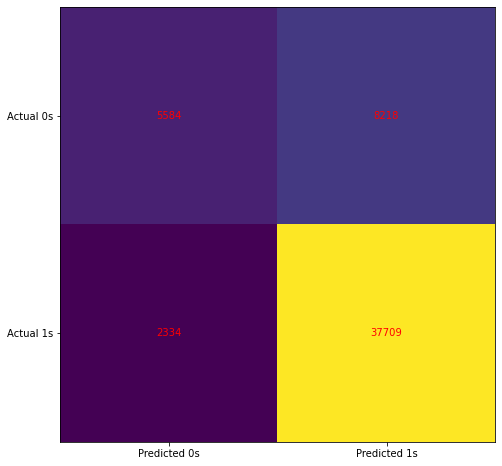

In [101]:
# Generate the confusion matrix
cm = confusion_matrix(y, model1.predict(reduced_x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

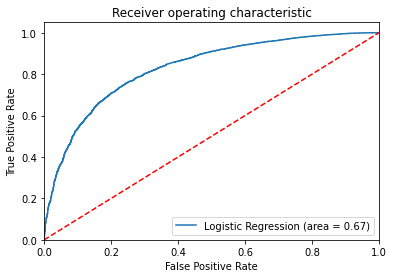

In [102]:
# generate the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [103]:
## 2. Linear support vector classification
from sklearn.svm import LinearSVC
LinearSVM = LinearSVC().fit(X_train, y_train)

# Predict y data with classifier: 
y_pred = LinearSVM.predict(X_test)


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


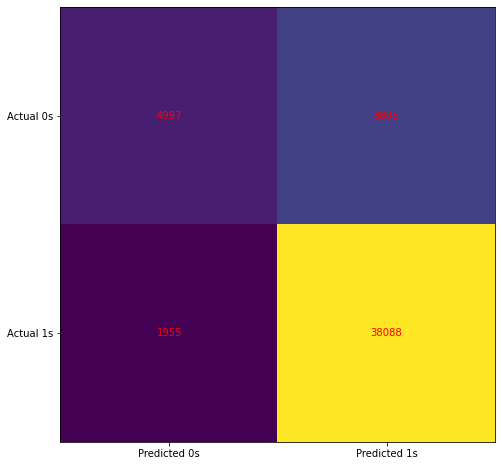

In [104]:
## generate the confusion matrix
cm = confusion_matrix(y, LinearSVM.predict(reduced_x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [34]:
# Find the accuracy of the model
svm1 = LinearSVM.score(X_test, y_test)
svm1

0.8032314978178103

In [35]:
# Actual prediction
y_predict = LinearSVM.predict(X_test)

In [36]:
## MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, y_predict))
print("mean_squared_error:", mean_squared_error(y_test, y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, y_predict)))
print("r2 score:", r2_score(y_test, y_predict))

mean_absolute_error: 0.1967685021821896
mean_squared_error: 0.1967685021821896
rmse: 0.44358595805344153
r2 score: -0.03777514250613412


In [37]:
## 3. Navie Bayes classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

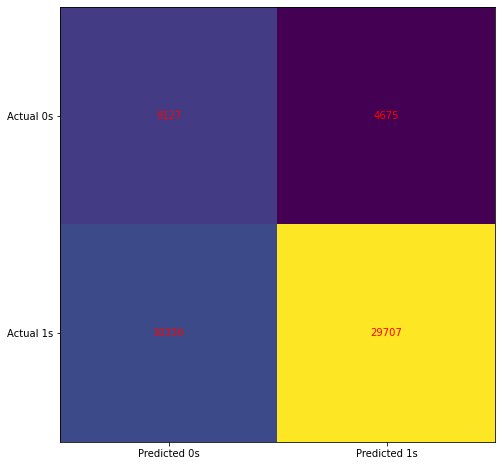

In [39]:
## generate the confusion matrix
cm = confusion_matrix(y, model.predict(reduced_x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [40]:
# Find the accuracy of the model
nb1 = model.score(X_test, y_test)
nb1

0.7228154889033337

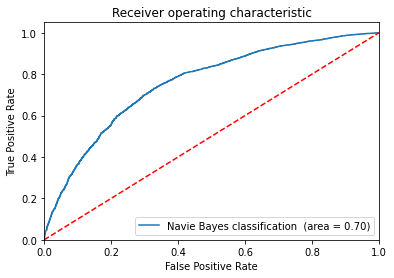

In [41]:
# generate the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
nb_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Navie Bayes classification  (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [42]:
y_predict = model.predict(X_test)

In [43]:
## MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, y_predict))
print("mean_squared_error:", mean_squared_error(y_test, y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, y_predict)))
print("r2 score:", r2_score(y_test, y_predict))

mean_absolute_error: 0.27718451109666636
mean_squared_error: 0.27718451109666636
rmse: 0.5264831536684401
r2 score: -0.46189655515847594


In [44]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=25)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25)

In [ ]:
## generate the confusion matrix
cm = confusion_matrix(y, random_forest.predict(reduced_x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [47]:
# Find the accuracy of the model
rf1 = random_forest.score(X_test, y_test)
rf1

0.7925526975578048

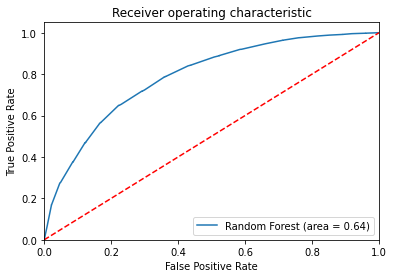

In [48]:
# generate the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
random_forest_roc_auc = roc_auc_score(y_test, random_forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % random_forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [49]:
y_predict = random_forest.predict(X_test)

In [50]:
## MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, y_predict))
print("mean_squared_error:", mean_squared_error(y_test, y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, y_predict)))
print("r2 score:", r2_score(y_test, y_predict))

mean_absolute_error: 0.2074473024421952
mean_squared_error: 0.2074473024421952
rmse: 0.45546383219987424
r2 score: -0.09409611531793471


In [113]:
## KNN
## choose the sqrt of sample size
### But KNN has a bad performance on training big dataset

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=300)

In [114]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=300)

In [115]:
# Find the accuracy of the model
knn1 = knn_model.score(X_test, y_test)
knn1

0.16914438432963386

y_predict = knn_model.predict(X_test)

In [57]:
## MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, y_predict))
print("mean_squared_error:", mean_squared_error(y_test, y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, y_predict)))
print("r2 score:", r2_score(y_test, y_predict))

mean_absolute_error: 0.2074473024421952
mean_squared_error: 0.2074473024421952
rmse: 0.45546383219987424
r2 score: -0.09409611531793471


In [58]:
##---------------------------------------------------------##
## Different approaches for testing
## set the y variable as continuous variable
from sklearn.preprocessing import LabelBinarizer
y_variable = DF_Final["Star"]
y_variable

0        5.0
1        5.0
2        3.0
3        5.0
4        4.0
        ... 
53840    3.0
53841    5.0
53842    5.0
53843    5.0
53844    5.0
Name: Star, Length: 53845, dtype: float64

In [61]:
## set the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(reduced_x, y_variable, test_size=0.2)

In [62]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [63]:
## MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, dtree_predictions))
print("mean_squared_error:", mean_squared_error(y_test, dtree_predictions))
print("rmse:", sqrt(mean_squared_error(y_test, dtree_predictions)))
print("r2 score:", r2_score(y_test, dtree_predictions))

mean_absolute_error: 0.8149317485374686
mean_squared_error: 1.479245983842511
rmse: 1.2162425678467725
r2 score: -0.3151624394579313


In [64]:
# Find the accuracy of the model
dt2 = dtree_model.score(X_test, y_test)

dt2

0.433002135760052

In [65]:
## training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 233).fit(X_train, y_train)
  
# accuracy on X_test
knn2 = knn.score(X_test, y_test)

knn2

0.4770173646578141

In [66]:
knn_prediction = knn.predict(X_test)

In [67]:
## MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, knn_prediction))
print("mean_squared_error:", mean_squared_error(y_test, knn_prediction))
print("rmse:", sqrt(mean_squared_error(y_test, knn_prediction)))
print("r2 score:", r2_score(y_test, knn_prediction))

mean_absolute_error: 0.7172439409415916
mean_squared_error: 1.24319806853004
rmse: 1.1149879230422364
r2 score: -0.10529784930714281


In [68]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
nb2 = gnb.score(X_test, y_test)

print(nb2)

0.3696722072615842


In [69]:
## MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, gnb_predictions))
print("mean_squared_error:", mean_squared_error(y_test, gnb_predictions))
print("rmse:", sqrt(mean_squared_error(y_test, gnb_predictions)))
print("r2 score:", r2_score(y_test, gnb_predictions))

mean_absolute_error: 1.1937970099359272
mean_squared_error: 2.9791066951434675
rmse: 1.7260088919653536
r2 score: -1.6486529430439014


In [70]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = LinearSVC().fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
svm2 = svm_model_linear.score(X_test, y_test)
svm2
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [82]:
## MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, svm_predictions))
print("mean_squared_error:", mean_squared_error(y_test, svm_predictions))
print("rmse:", sqrt(mean_squared_error(y_test, svm_predictions)))
print("r2 score:", r2_score(y_test, svm_predictions))

mean_absolute_error: 0.6712786702572198
mean_squared_error: 1.1431887826167704
rmse: 1.0692000666932127
r2 score: -0.01638197063192659
